In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


This dataset contains a total of 14 columns including both features and target variable.

We have to perform 2 tasks using this same dataset as it is defined in our problem statement.

In Task 1, we will take 'Average Price' as the target column which has continous data so it is a regression type problem while in Task 2, we will take 'Region' as the target column which has classes so it is a classification problem.

The dataset contains both numeric as well as categorical data.

In [3]:
# Dropping the unnamed column as it is only for indexing purpose.
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

In [5]:
# Checking the dimension of the dataset
df.shape

(18249, 13)

In [6]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in this dataset contains three different types of data - float, integer and object datatype. There are 3 columns having object datatype that are categorical in nature which needs to be encoded. The Date column is showing object datatype. So splitting the Date into Month and Day. Since year column is already present, no need to separate it.

In [7]:
# Changing date column from object type to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Checking the dtypes again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [9]:
df['Month'] = df['Date'].dt.month

In [10]:
df['Day'] = df['Date'].dt.day

Now we have separated Month and Day from Date column and now the column Date is no use,so dropping it.

In [11]:
df.drop("Date",axis=1,inplace=True)

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
# checking the dimensions of dataset again
df.shape

(18249, 14)

In [14]:
# Overviewing the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [15]:
# checking the number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [16]:
# Checking for null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

As we can see there are no null values present in the dataset.

# Visualizing Missing Values using heatmap

<AxesSubplot:>

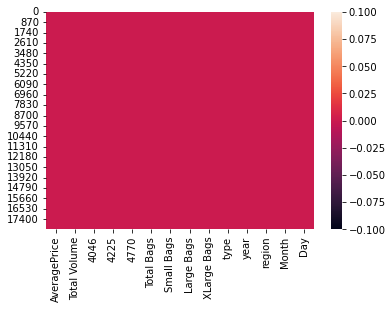

In [17]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())

By visualizing also we can also say there are no missing values and the data is clean.

In [18]:
# Checking the number of columns in the datast
df.columns.tolist()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Month',
 'Day']

In [19]:
# Checking the uniqueness of the target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [20]:
# List of values in the target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [21]:
# Checking whether the dataset contains any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


As we can see, there are no spaces present in the dataset.

# Description of Dataset

In [22]:
# Statistical summary of the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset.

The label Average Price has mean which is bit greater than median, means it is skewed to right.

The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.

Before visualizing the data let's separate the categorical and numerical columns.

In [23]:
# Checking for Categorical columns
Categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
print(Categorical_col)

['type', 'region']


In [24]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Visualization of Dataset

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


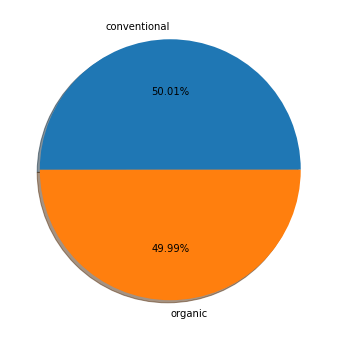

In [25]:
# Visualize the count of type of the avacado
print(df['type'].value_counts())
labels = 'conventional', 'organic'
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(df['type'].value_counts(), labels = labels, autopct = '%1.2f%%', shadow = True)
plt.show()

We can observe both conventional and organic types of avacado are equal in counts, which means both have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


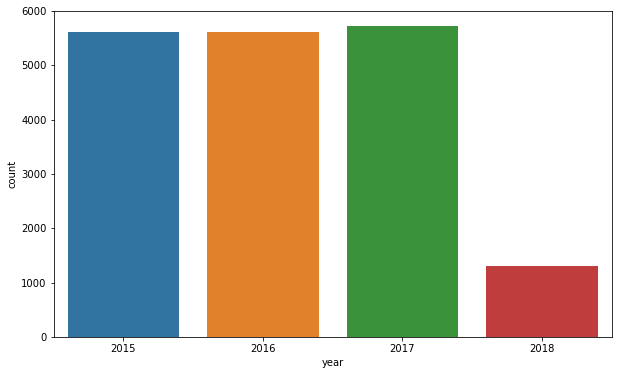

In [26]:
# Visualize the count of the year
print(df['year'].value_counts())
plt.figure(figsize = (10, 6))
sns.countplot(df['year'])
plt.show()

The count of 2017 is bit higher than2016 and 2015, 2018 has very less count, which means the price and the sales of avacado is less in this year.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

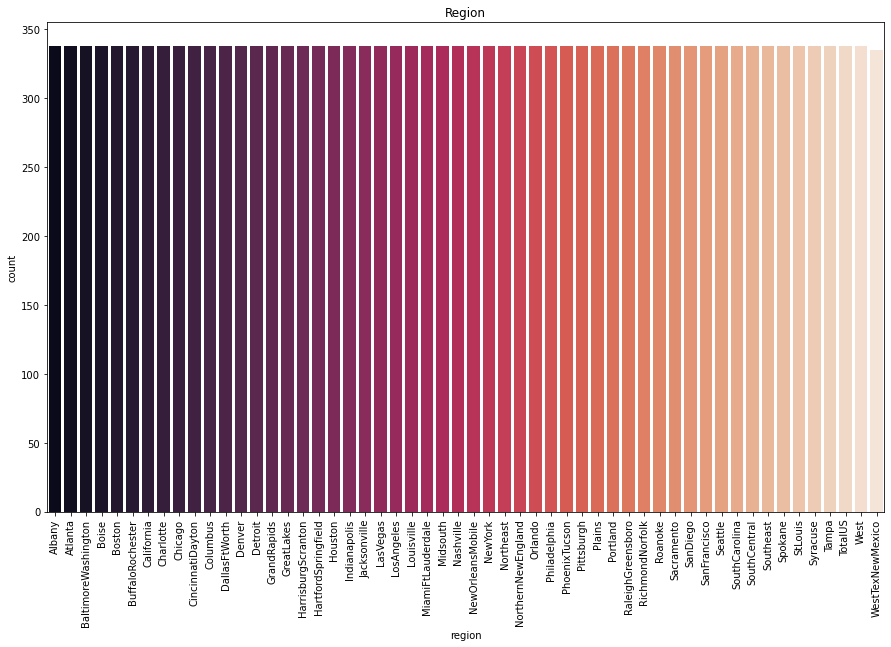

In [27]:
# Visualize the count of the region
print(df['region'].value_counts())
plt.figure(figsize = (15, 9))
sns.countplot(df['region'], palette = "rocket")
plt.title("Region")
plt.xticks(rotation = 90)
plt.show()

We can observe the count of avacado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is a bit less than other regions. Lets plot the distribution plot to know how the data has been distributed in all the columns.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


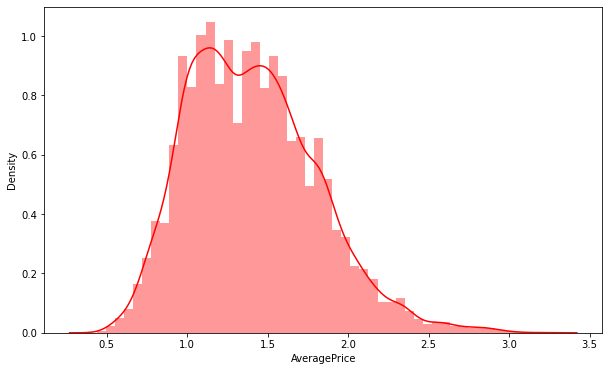

In [28]:
# Distribution plot for the target variable "AveragePrice"
print(df['AveragePrice'].value_counts())
plt.figure(figsize = (10, 6))
sns.distplot(df['AveragePrice'], color = 'r')
plt.show()

We can visualize that the data is normally distributed in the label. Also the price of the avacado is more between 1.0 - 1.5.

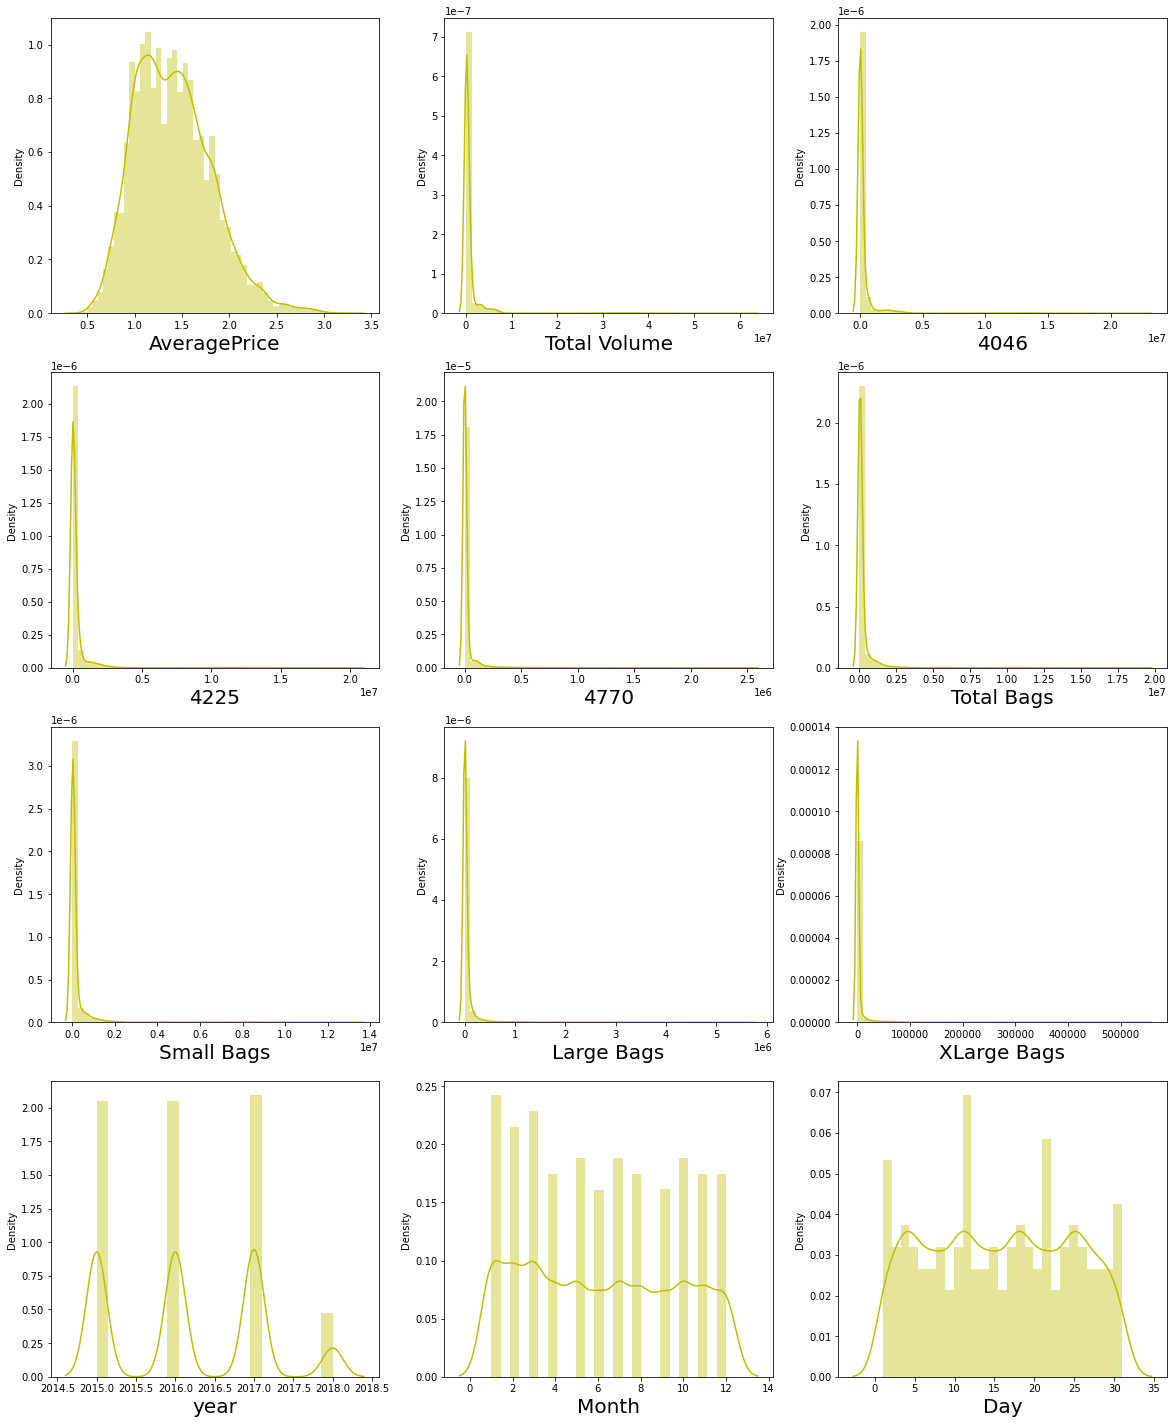

In [29]:
# Checking how the data is distributed in each column.
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col], color = 'y')
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.show()

From the graphs we can observe that none of the columns are normally distributed except the target column. Also there is a huge skewness in most of the features, most of them are skewed to the left which means median is more than the mean. This skewness needs to be removed later.

# Bivariate Analysis

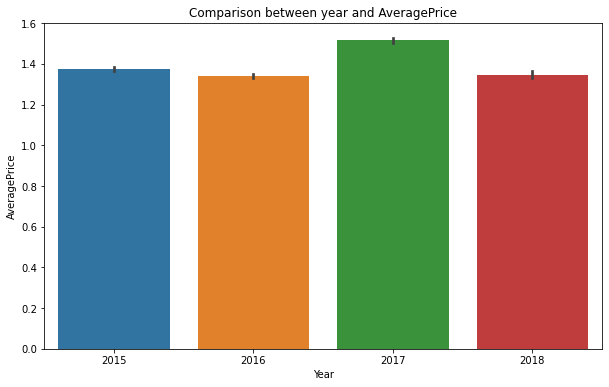

In [30]:
# Checking which year has maximum AveragePrice
plt.figure(figsize = (10, 6))
plt.title("Comparison between year and AveragePrice")
sns.barplot(df['year'], df['AveragePrice'], data = df)
plt.xlabel("Year")
plt.ylabel("AveragePrice")
plt.show()

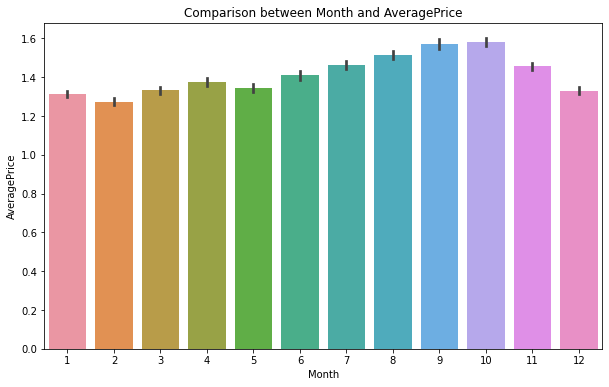

In [31]:
# Checking which month has maximum AveragePrice
plt.figure(figsize = (10, 6))
plt.title("Comparison between Month and AveragePrice")
sns.barplot(df['Month'], df['AveragePrice'], data = df)
plt.xlabel("Month")
plt.ylabel("AveragePrice")
plt.show()

The barplot shows that the AveragePrice remains high during 8th,9th and 10th i.e. (August,September and October) month and falls in the month of November and December. The AveragePrice of Avocado is least in the 2nd month i.e. Feburary month.

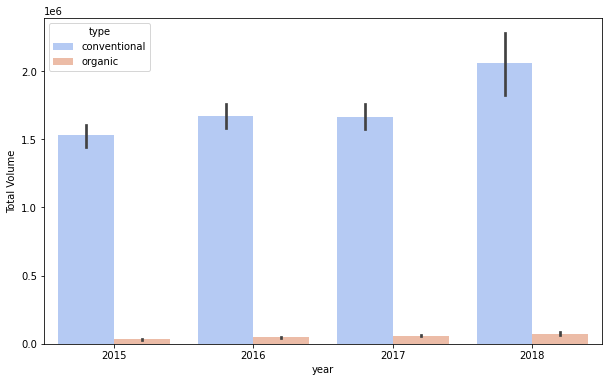

In [32]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'year', y = 'Total Volume', hue = 'type', data = df, palette = 'coolwarm', ci = 68)
plt.show()

Conventional types were sold higher every year as compared to the organic type which means the demand for the conventional type is higher as compared to organic type. The total sales volume is higher in the year 2018 and least in the year 2015 while 2016 and 2017 have the same sales volume.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

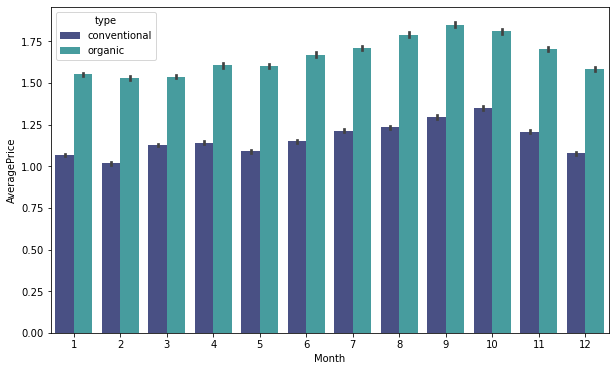

In [33]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Month', y = 'AveragePrice', hue = 'type', data = df, palette = 'mako', ci = 68)

From this plot we can see that AveragePrice of organic Avocado is more than that of the conventional avocado. The AveragePrice of both the Avocados is high in the month of August, September and October while the prices have dropped in the month of November and December.

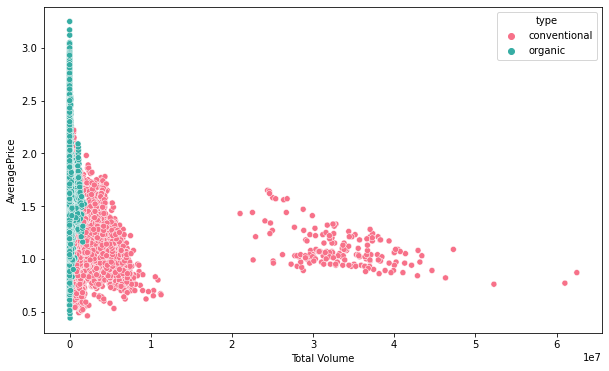

In [34]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "Total Volume", y = 'AveragePrice', hue = 'type', data = df, palette = 'husl') 
plt.show()

The scatterplot gives the relationship between the total volume and average price with respect to type. All organic type of avocado lies in the zero volume and the average price is high for organic. The conventional type avocado has total volume 0-4 with the average price upto 2.3. So the Average Price of the organic type with zero volume is more than the conventional type.

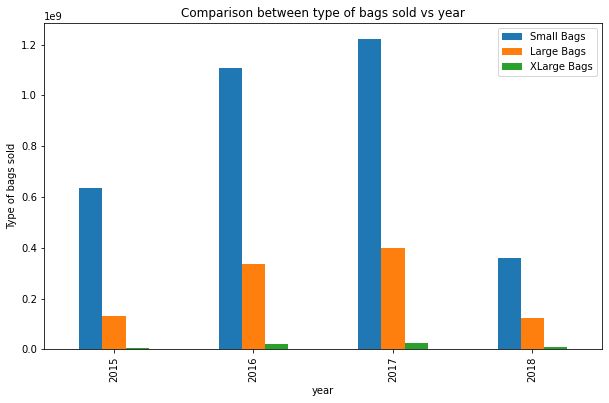

In [35]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.year).sum()
feature.plot(kind ='bar', fontsize = 10, figsize = (10, 6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

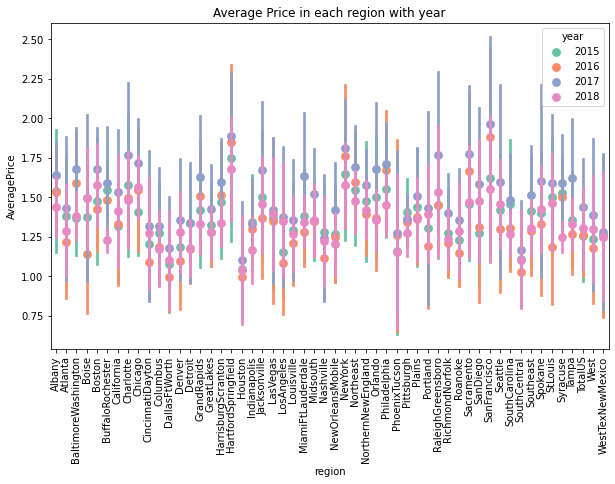

In [36]:
plt.figure(figsize = (10, 6))
plt.title("Average Price in each region with year")
sns.pointplot(x = 'region', y = 'AveragePrice', data = df, hue = 'year', join = False, palette = 'Set2', ci = 'sd')
plt.xticks(rotation = 90)
plt.show() 

The average price of the avocado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

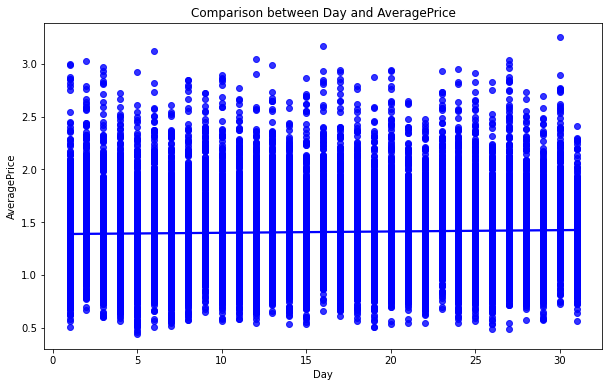

In [37]:
plt.figure(figsize = (10, 6))
plt.title("Comparison between Day and AveragePrice")
sns.regplot(df['Day'], df['AveragePrice'], color = 'b')
plt.show()

The average price of avocado is high in almost all the days and less in 7th, 14th, 22nd and 31st day of the month.

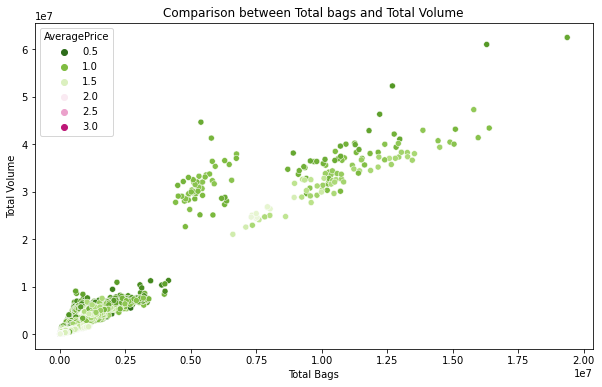

In [38]:
plt.figure(figsize = (10, 6))
plt.title("Comparison between Total bags and Total Volume")
sns.scatterplot(data = df, x = 'Total Bags', y = 'Total Volume', hue = 'AveragePrice', palette = 'PiYG_r')
plt.show()

We can see a linear relation between the Total bags with Total Volume. As the total bags sales increases with total volume, the price of the avocado also increases.

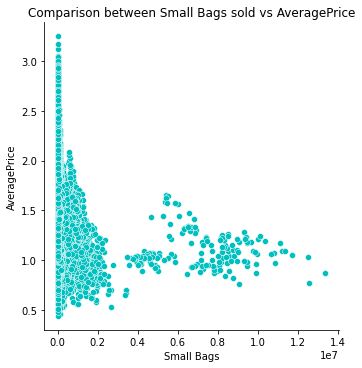

In [39]:

sns.relplot(df['Small Bags'], df['AveragePrice'], color = 'c')
plt.title("Comparison between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

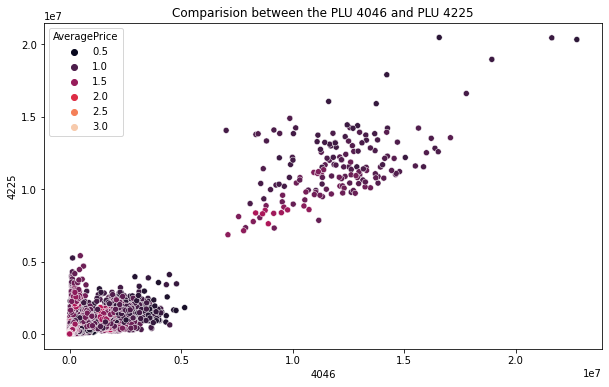

In [40]:
plt.figure(figsize = (10, 6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"], df["4225"], hue = df["AveragePrice"], palette = "rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph.

# Multivariate Analysis

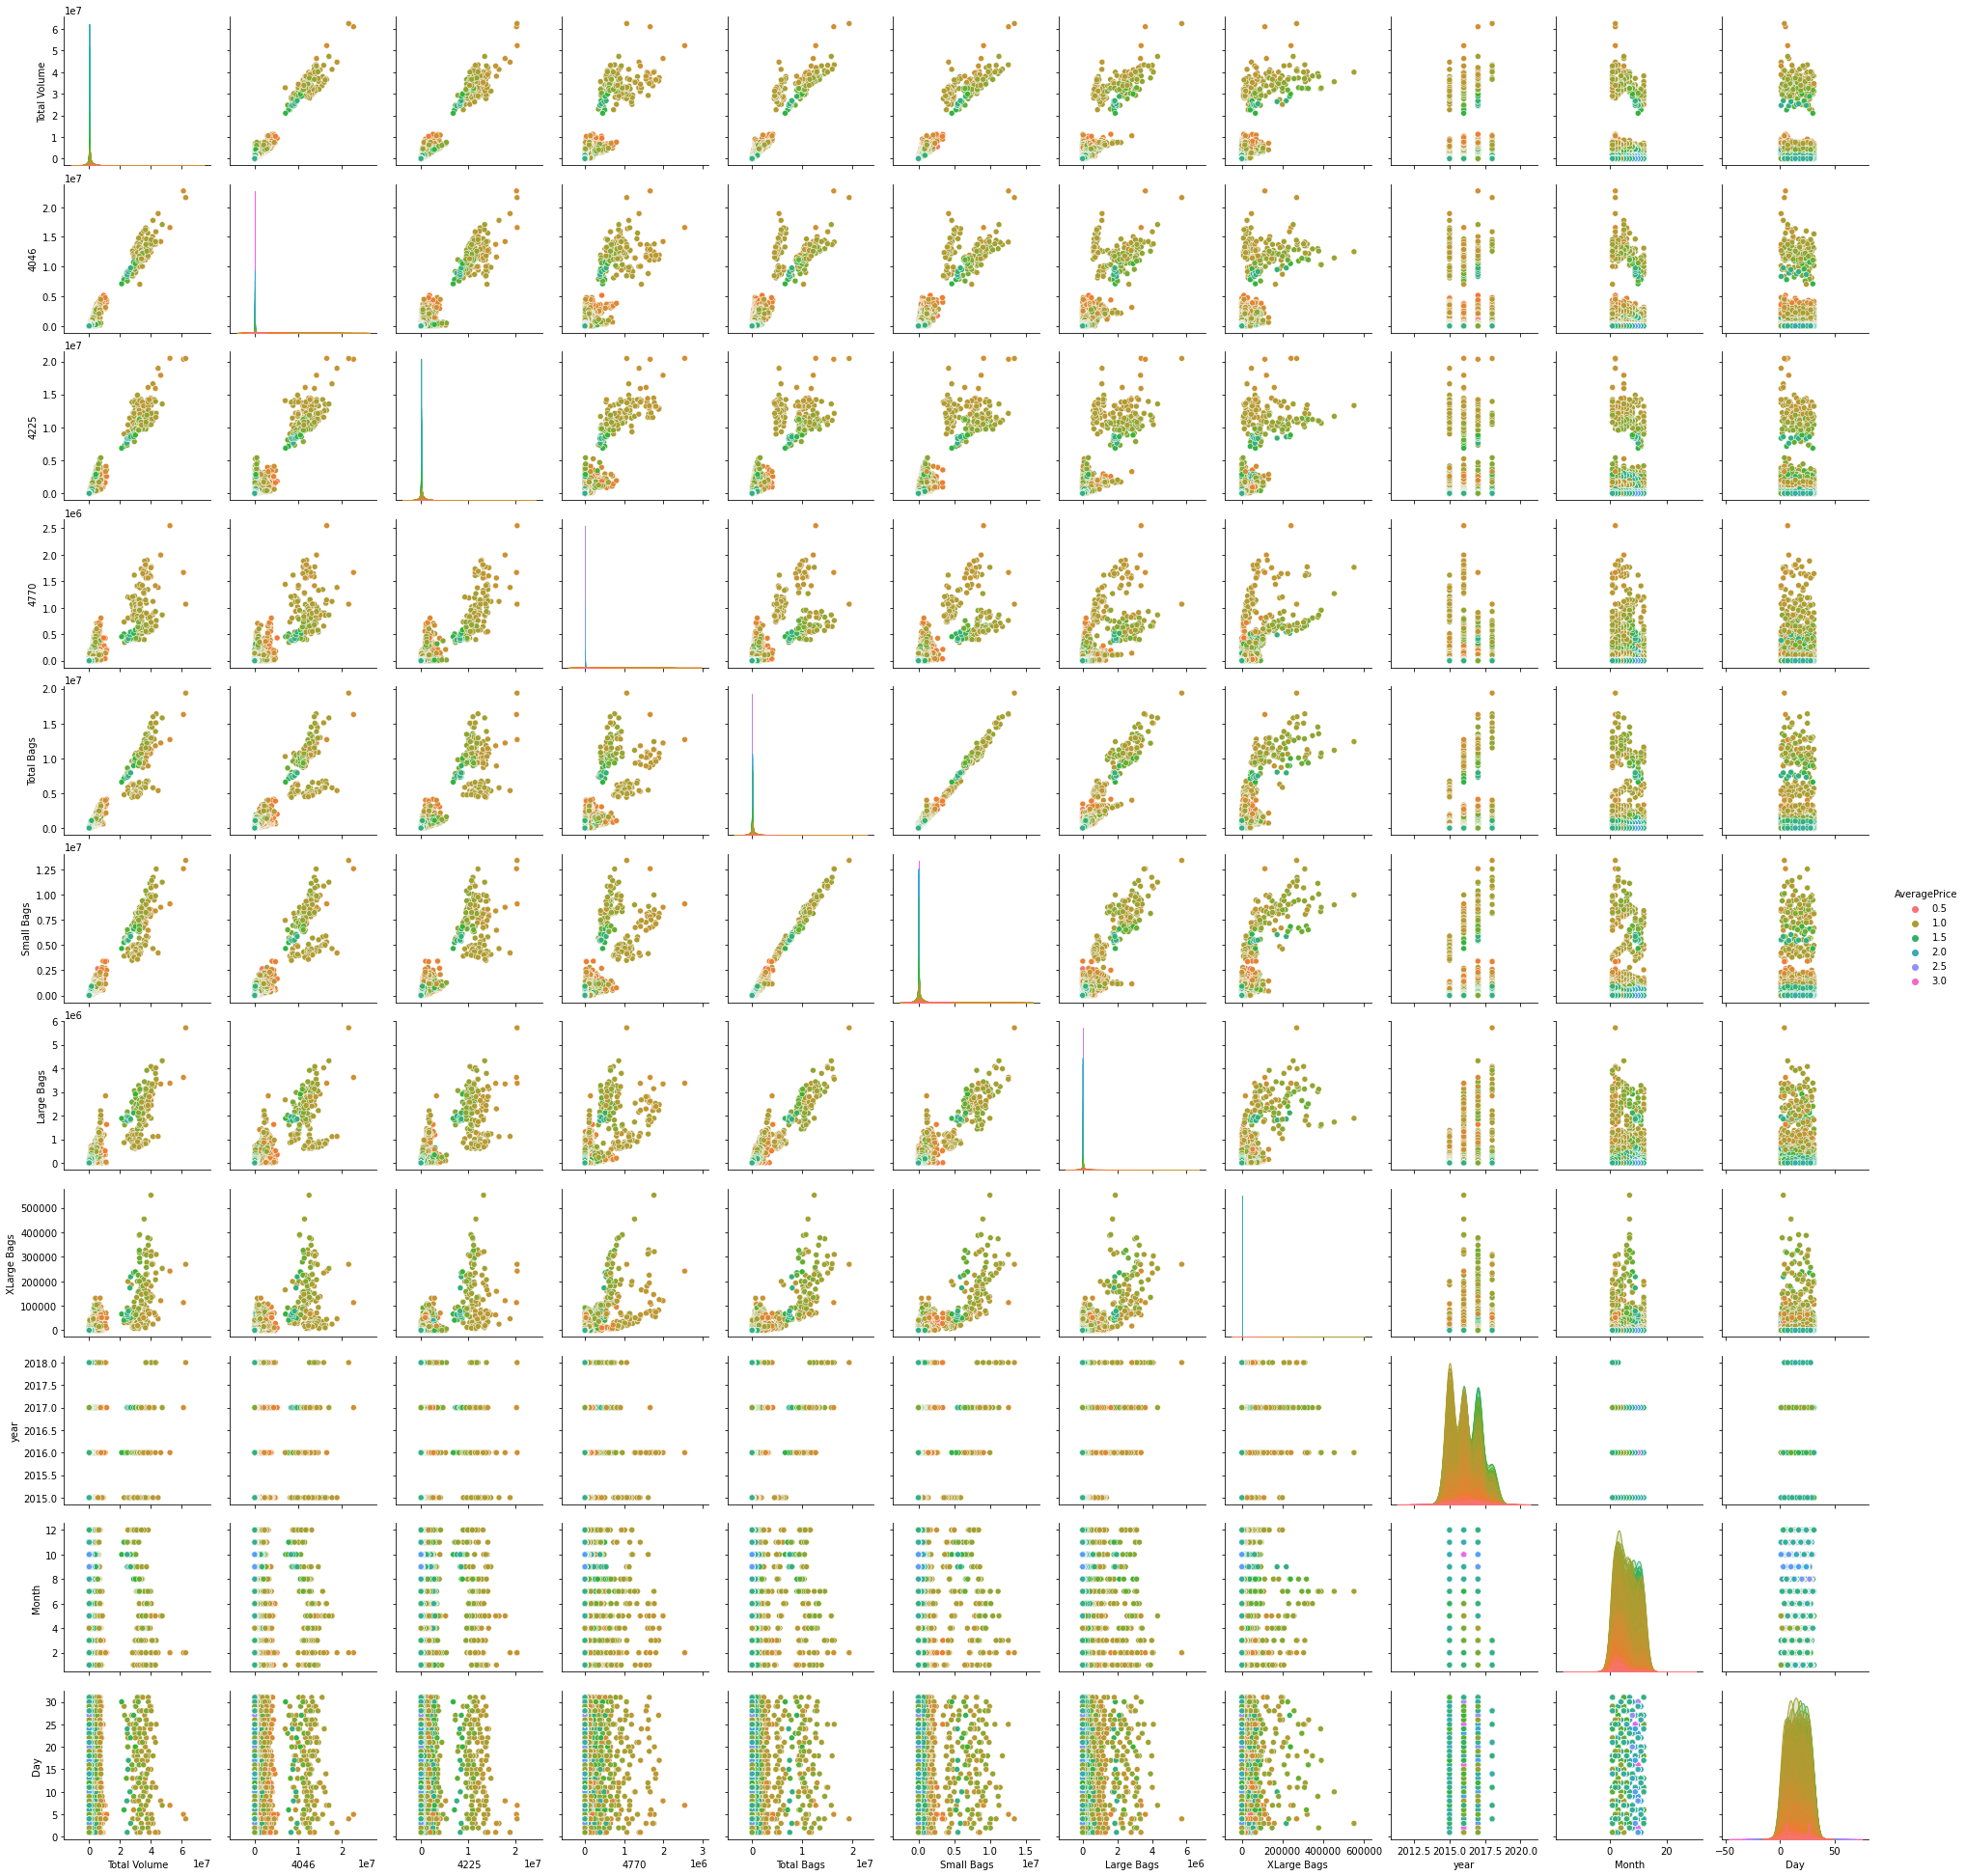

In [41]:
sns.pairplot(df, hue = "AveragePrice", palette = "husl")

This gives the pairwise relationship between the columns which are plotted with respect to target variable "AvceragePrice". Here we can observe the relation between the features and label. From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

Here we can state that there exists a linear relationship in most of the columns and other have no much relationship with each other.

We can also observe the correlation between the features and some columns have outliers too.

Day column is highly correlated with all the other features.

# Outliers

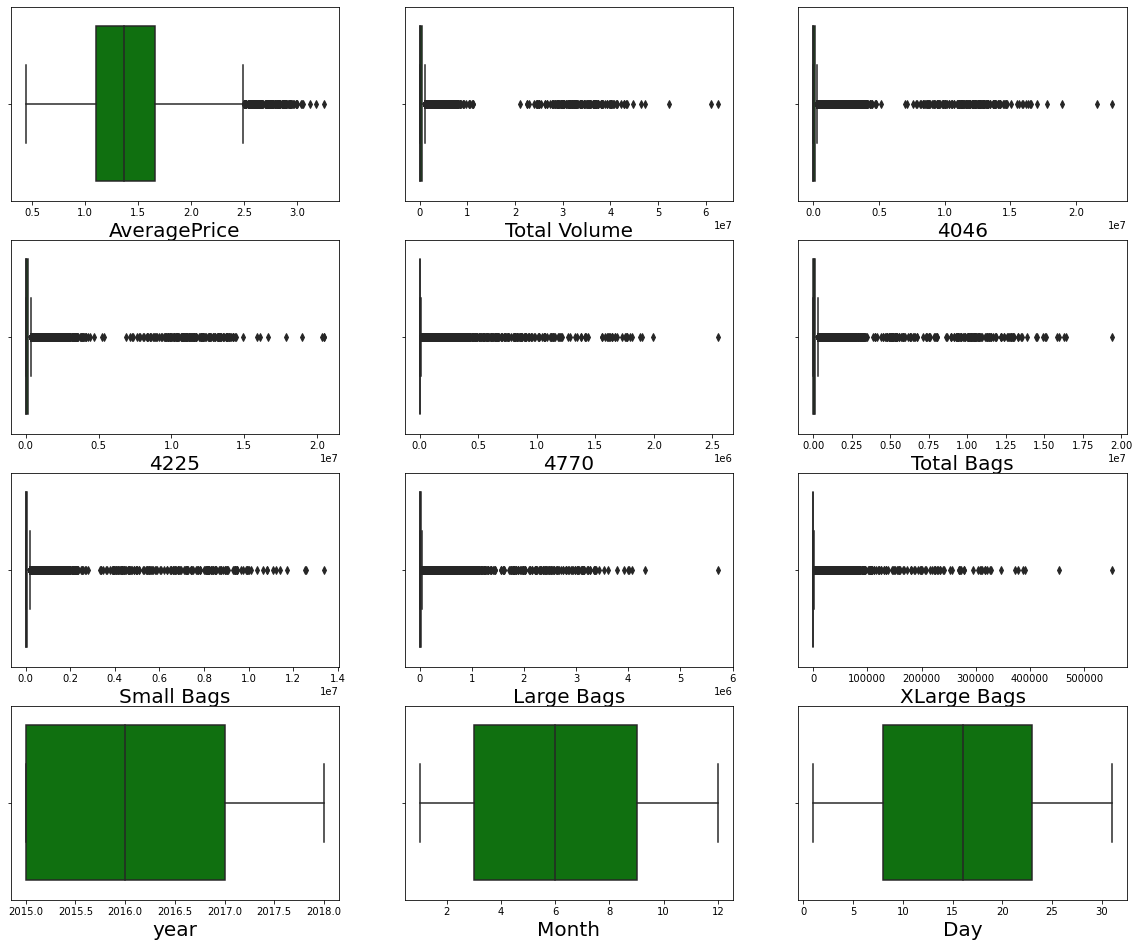

In [42]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6, 3, plotnumber)
        sns.boxplot(df[col], color = 'g')
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.show()

As we can see heavy outliers are present in almost all the columns except year, Month and Day which needs to be removed for futher data processing. Even the label has outliers present but as it is target variable, no need to remove outlier from it.

# Removing Outliers

# Zscore method

In [43]:
from scipy.stats import zscore
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z = np.abs(zscore(features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [44]:
new_df = df[(z<3).all(axis = 1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [45]:
print(df.shape)
print(new_df.shape)

(18249, 14)
(17782, 14)


# Data loss percent

In [46]:
(18249-17782)/18429*100

2.5340495957458353

So we can see here that after removing outlier the data loss is not more. So we will continue with the new dataframe.

# Checking for Skewness

In [47]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Removing Skewness using yeo-johnson

In [48]:
# Removing skewness using yeo johnson to get better predictions
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [49]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [50]:

# Checking the skewness after applying yeo-johnson method
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [51]:
# Removing skewness using log transformation
new_df['XLarge Bags'] = np.log1p(new_df['XLarge Bags'])

In [52]:
# Checking the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

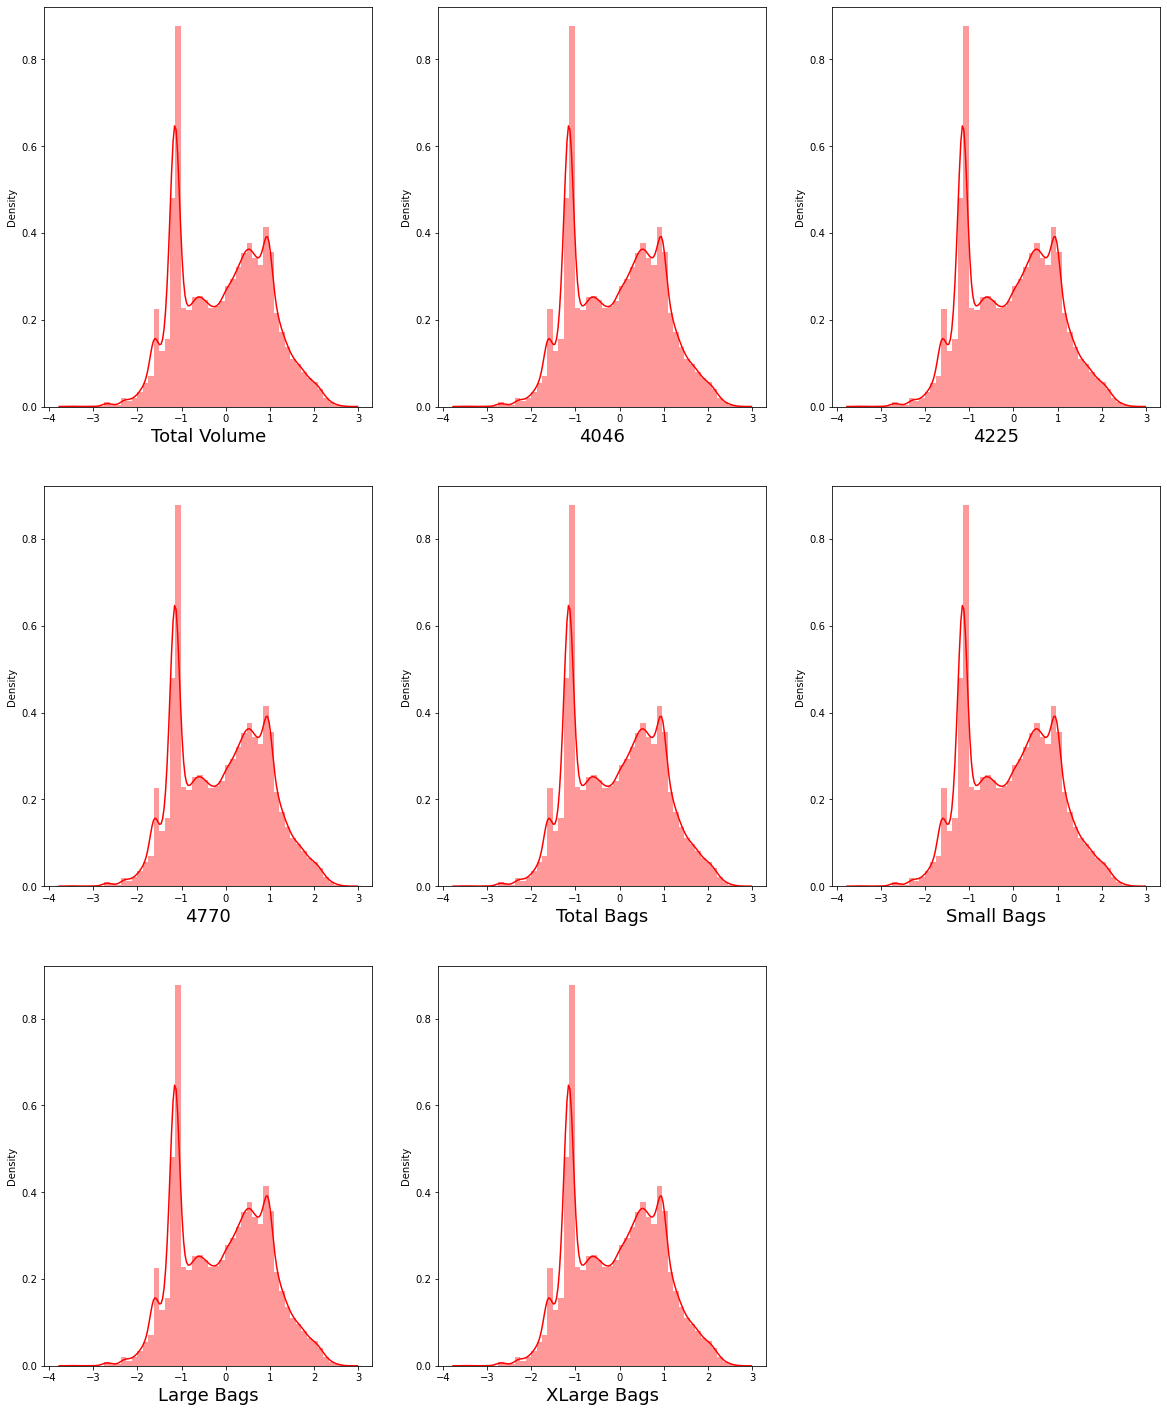

In [53]:
# Checking the data distribution in each column

plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1

for col in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(new_df[features], color = 'r')
        plt.xlabel(col, fontsize = 18)
    plotnumber+=1
plt.show()

# Encoding the Categorical data using LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type', 'region']
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [55]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation

In [56]:
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


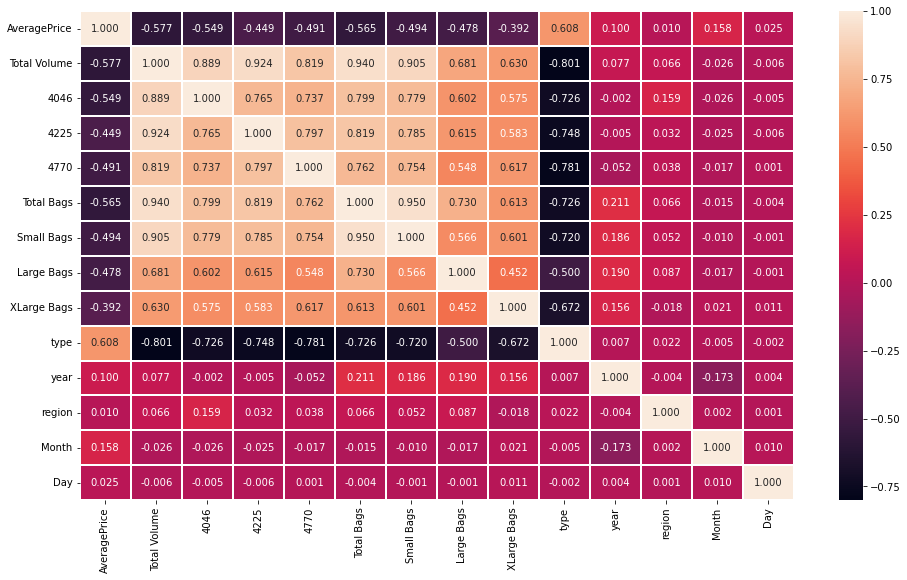

In [57]:
#Lets visualize the coorelation using heatmap
plt.figure(figsize = (16, 9))
sns.heatmap(new_df.corr(), linewidths = 0.1, fmt = "0.3f", annot = True)
plt.show()

The heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature with another. This heatmap contains both positive and negative correlation.

Almost all features are highly negatively correlated with the target variable and few columns year, month and type have positive coorelation with the target.

The features Day and the region has no relation with the target,so we can drop these columns.

Almost all the features are correlated with each other which lead to multicolinearity problem which can be resolved using VIF.

Also most of the columns have no correlation with each other and have zero correlation

# Visualizing the correaltion between label and features using bar plot

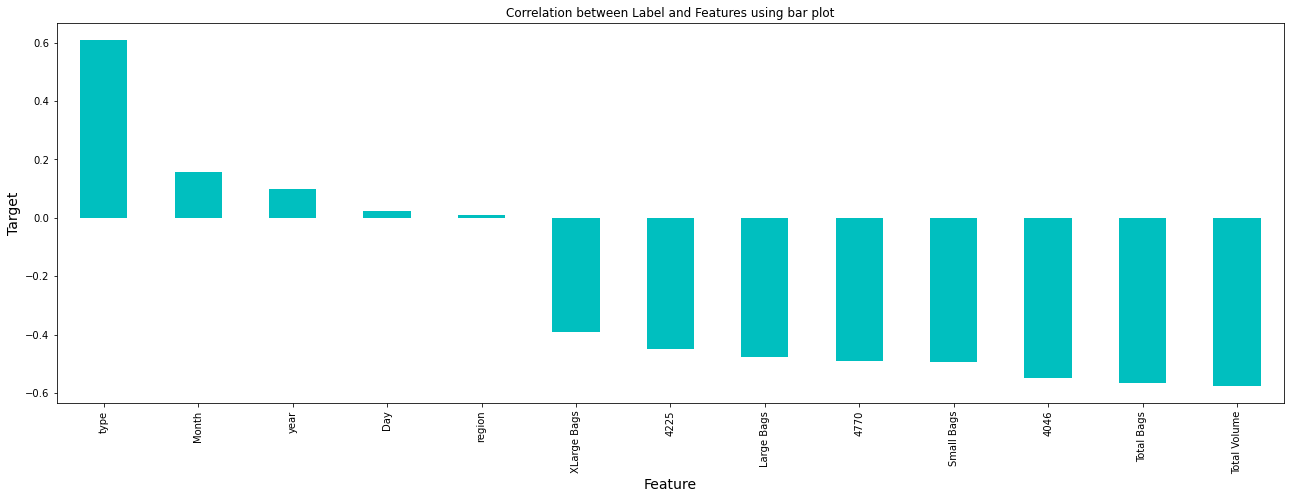

In [58]:
plt.figure(figsize = (22, 7))
new_df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

In [59]:
# Dropping irrelavent columns
new_df.drop('region',axis=1,inplace=True)
new_df.drop('Day',axis=1,inplace=True)

In [60]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


# Separating out features and labels

In [61]:
x = new_df.drop('AveragePrice',axis=1)
y = new_df['AveragePrice']

In [62]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


# Standard Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


# Multicolinearity

In [64]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


The vif value is more than 10 in ther features Total Volume, 4225, Total Bags, Small Bags and Large Bags. Removing the vif having highest vif value

In [65]:
# Dropping the feature Total Volume
x.drop('Total Volume',axis=1,inplace=True)

In [66]:
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,3.546068,4046
1,4.272321,4225
2,3.936681,4770
3,24.479948,Total Bags
4,16.630524,Small Bags
5,3.419283,Large Bags
6,2.053729,XLarge Bags
7,3.487456,type
8,1.383630,year
9,1.051817,Month


In [67]:
# Droping the column total Bags
x.drop('Total Bags', axis = 1, inplace = True)

In [68]:
# checking VIF again
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,3.527072,4046
1,4.127765,4225
2,3.936426,4770
3,4.098464,Small Bags
4,1.864199,Large Bags
5,2.053482,XLarge Bags
6,3.484298,type
7,1.359151,year
8,1.051183,Month


# Modeling
Finding the best random state

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
from sklearn.neighbors import KNeighborsRegressor as KNN

maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    knn = KNN()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Maximum r2_score is ", maxAcc, "at random_state", i)

Maximum r2_score is  0.8666077410567096 at random_state 99


# Creating new train test split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

# Regression Algorithms

In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [73]:
# Checking r2_score for Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
print("R2_score:", r2_score(y_test, pred_LR))
print("MAE:", metrics.mean_absolute_error(y_test, pred_LR))
print("MSE:", metrics.mean_squared_error(y_test, pred_LR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))

R2_score: 0.5090662461278551
MAE: 0.2199134962850692
MSE: 0.08037304329520864
RMSE: 0.28350139910626304


# RandomForestRegressor

In [74]:
# checking r2_score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
print("R2_score :", r2_score(y_test, pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print("MSE:", metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared error(RMSE)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

R2_score : 0.8728835575930183
MAE: 0.10083092783505154
MSE: 0.020810822740393618
RMSE: 0.14425956724042124


# Support Vector Machine Regressor

In [75]:
# checking r2_score for SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
print("r2_score:", r2_score(y_test, pred_svr))
print("MAE:", metrics.mean_absolute_error(y_test, pred_svr))
print("MSE:", metrics.mean_squared_error(y_test, pred_svr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

r2_score: 0.777355927488341
MAE: 0.1401015979329984
MSE: 0.03645009441347451
RMSE: 0.1909190781809783


# Stochastic Gradient Descent Regressor

In [76]:
# Checking r2_score for SGD
SGD = SGDRegressor()
SGD.fit(x_train, y_train)
pred_SGD = SGD.predict(x_test)
print("R2_score:", r2_score(y_test, pred_SGD))
print("MAE:", metrics.mean_absolute_error(y_test, pred_SGD))
print("MSE:", metrics.mean_squared_error(y_test, pred_SGD))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_SGD)))

R2_score: 0.5078936586922032
MAE: 0.22018344399083145
MSE: 0.08056501302633781
RMSE: 0.28383976646399955


# KNN Regressor

In [77]:
# Checking r2_score for KNN
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print("R2_score:", r2_score(y_test, pred_knn))
print("MAE:", metrics.mean_absolute_error(y_test, pred_knn))
print("MSE:", metrics.mean_squared_error(y_test, pred_knn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

R2_score: 0.8666077410567096
MAE: 0.10409109653233364
MSE: 0.02183826579194002
RMSE: 0.14777775810973728


# Gradient Boosting Regressor

In [78]:
# Checking r2_score for KNN
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
pred_GB = GB.predict(x_test)
print("R2_score:", r2_score(y_test, pred_GB))
print("MAE:", metrics.mean_absolute_error(y_test, pred_GB))
print("MSE:", metrics.mean_squared_error(y_test, pred_GB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_GB)))

R2_score: 0.7238190211561438
MAE: 0.1611634725807183
MSE: 0.04521486981665413
RMSE: 0.2126378842460913


# Cross Validation Score

In [79]:
# Checking cross valiodation score for LinearRegressor
print("Cross_Validation_Score", cross_val_score(LR, x, y, cv = 5).mean())

Cross_Validation_Score 0.09294620763838508


In [80]:
# Checking cross valiodation score for RandomForestRegressor
print("Cross_Validation_Score", cross_val_score(RFR, x, y, cv = 5).mean())

Cross_Validation_Score 0.2126833925355868


In [81]:
# Checking cross valiodation score for SVR
print("Cross_Validation_Score", cross_val_score(svr, x, y, cv = 5).mean())

Cross_Validation_Score 0.18236483729214262


In [82]:
# Checking cross valiodation score for SGDRegressor 
print("Cross_Validation_Score", cross_val_score(SGD, x, y, cv = 5).mean())

Cross_Validation_Score 0.09251684208104369


In [83]:
# Checking cross valiodation score for KNNRegressor
print("Cross_Validation_Score", cross_val_score(knn, x, y, cv = 5).mean())

Cross_Validation_Score 0.07961153938476018


In [84]:
# Checking cross valiodation score for GradientBoosting Regressor 
print("Cross_Validation_Score", cross_val_score(GB, x, y, cv = 5).mean())

Cross_Validation_Score 0.3523158470663289


From the difference between r2_score and cross validation score, we can conclude that KNeighborRegressor best fits the model.

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# KNeighbor Regressor
parameters = {'n_neighbors':[2, 3, 4, 5, 6],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[10, 20, 30, 40, 50],
             'weights':['uniform', 'distance']}

In [87]:
GCV = GridSearchCV(KNN(), parameters, cv = 5)

In [88]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [89]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [90]:
avacado = KNN(algorithm = 'auto', leaf_size = 10, n_neighbors = 4, weights = 'distance')
avacado.fit(x_train, y_train)
pred = avacado.predict(x_test)
print("RMSE value :", np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_score :', r2_score(y_test, pred)*100)

RMSE value : 0.14425956724042124
R2_score : 88.33347962936709


After tuning the r2_score of the model is increased and it is 88%.

# Saving the model

In [91]:
# saving the model using pkl
import joblib
joblib.dump(avacado,'Avacado.pkl')

['Avacado.pkl']

Predicting the saved model

In [92]:
# Loading the saved model
model = joblib.load('Avacado.pkl')

In [93]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_final = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1.34,1.276653
1,1.68,1.738082
2,1.81,1.675319
3,1.52,1.477260
4,1.62,1.585465
...,...,...
5330,1.26,1.324965
5331,1.63,1.556800
5332,0.77,1.181201
5333,1.84,1.779593


# Prediction Visualization

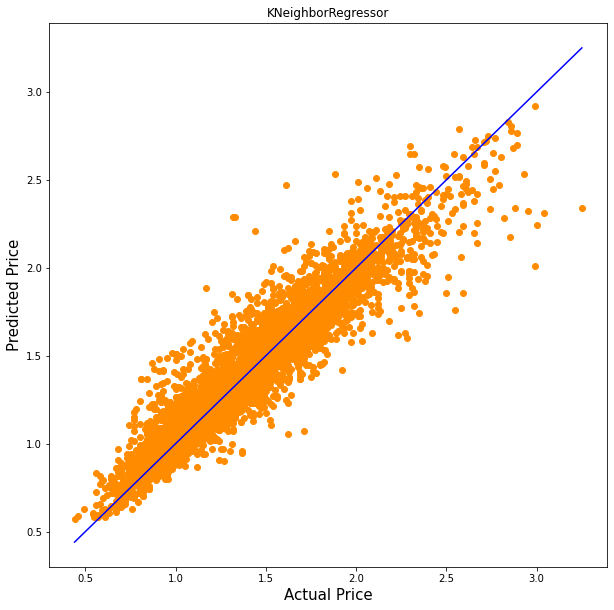

In [94]:
plt.figure(figsize = (10, 10))
plt.title("KNeighborRegressor")
plt.scatter(y_test, predicted, c = 'darkorange')
plt1 = max(max(predicted), max(y_test))
plt2 = min(min(predicted), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.show()

# Task 2

We need to find the region of Avocado observation. There are 53 different regions in the dataset.So, it its a type of multi-classification problem.

In [95]:
df_region =pd.read_csv('avocado.csv')
df_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [96]:
# List of values in the target column
df_region['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [97]:
# Checking the uniqueness of the target variable
df_region['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [98]:
#Label encoding the target column
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_region['region'] = lbl.fit_transform(df_region['region'])

In [99]:
df_region['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

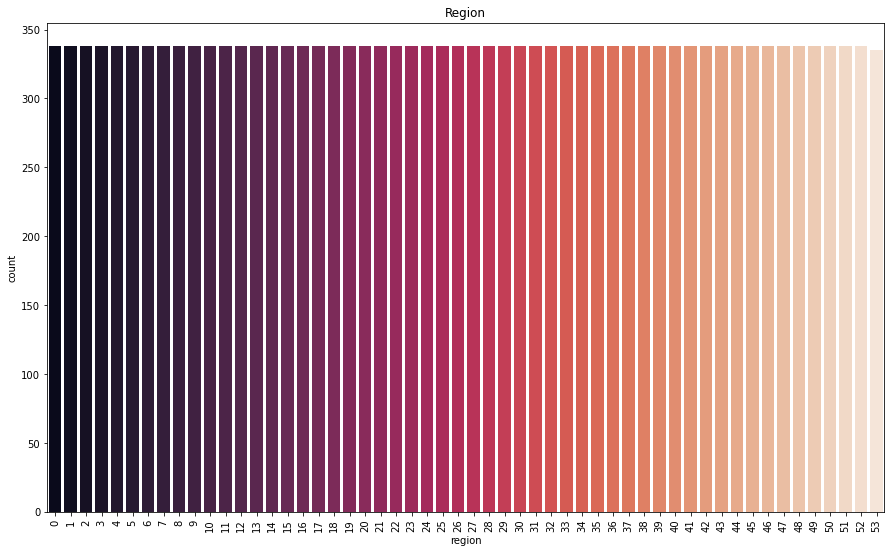

In [100]:
# Visualizing the region
plt.figure(figsize = (15, 9))
sns.countplot(df_region['region'], palette = "rocket")
plt.title("Region")
plt.xticks(rotation = 90)
plt.show()

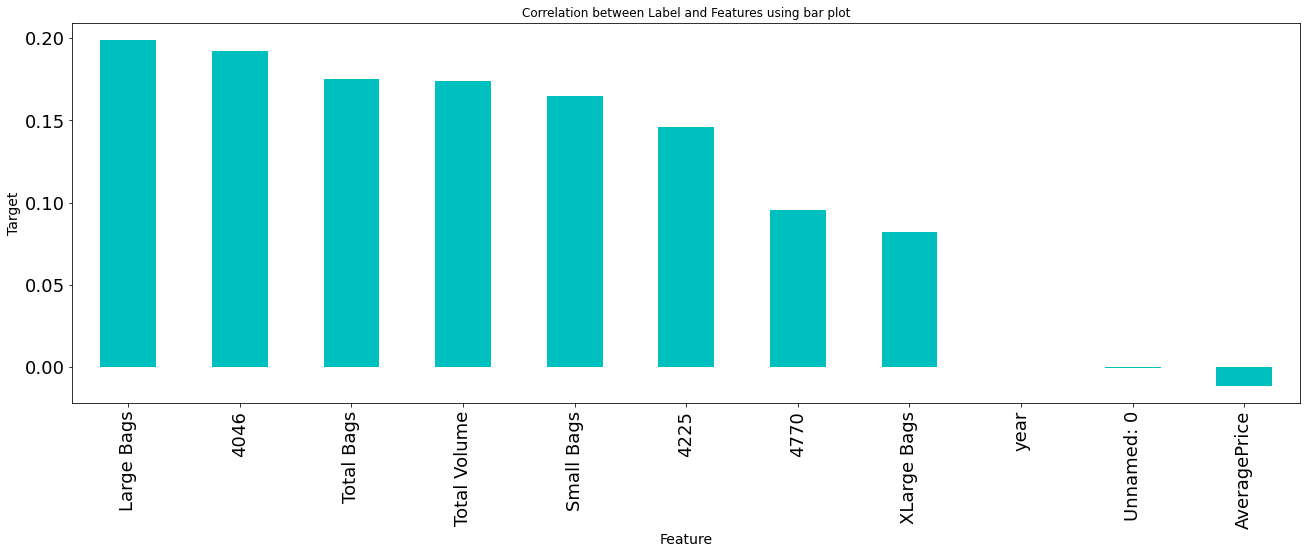

In [101]:
plt.figure(figsize = (22, 7))
df_region.corr()['region'].sort_values(ascending = False).drop(['region']).plot(kind='bar', color = 'c', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

In [102]:
# Dropping the unnamed column
df_region.drop("Unnamed: 0",axis=1,inplace=True)

# Dropping the year column
df_region.drop("year",axis=1,inplace=True)

In [103]:
# Changing date column from object type to Date type
df_region['Date'] = pd.to_datetime(df_region['Date'])

In [104]:
df_region['Month'] = df_region['Date'].dt.month
df_region['Day'] = df_region['Date'].dt.day

In [105]:
# Dropping the Date column
df_region.drop("Date", axis = 1, inplace = True)

In [106]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [107]:
# LabelEncoding the type column
df_region['type'] = lbl.fit_transform(df_region['type'])

# Separating dependent and independent variables

In [108]:
# Splitting the independent and dependent columns

x = df_region.drop(['region'], axis =1)
y = df_region['region']

# Standard Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

# Finding best random state

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.3304109589041096  on Random_State  199


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=199)

# LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.3304109589041096
[[ 30   0   0 ...   0   0   0]
 [  5  26   0 ...   0   0   0]
 [  0   0  42 ...   0   0   0]
 ...
 [  0   0   0 ... 100   7   0]
 [  0   0   0 ...   1  61   0]
 [  1   1   0 ...   0   0  21]]
              precision    recall  f1-score   support

           0       0.18      0.32      0.23        95
           1       0.51      0.27      0.36        95
           2       0.62      0.43      0.51        97
           3       0.07      0.34      0.11        94
           4       0.44      0.23      0.30       101
           5       0.31      0.23      0.27        96
           6       0.73      0.58      0.64       102
           7       0.16      0.32      0.21        94
           8       0.46      0.46      0.46       113
           9       0.27      0.51      0.35        92
          10       0.16      0.18      0.17        99
          11       0.20      0.55      0.29        96
          12       0.51      0.36      0.42       109
          13       0.74      0.2

From LogisticRegression we're getting 33% accuracy score.

# RandomForestClassifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8958904109589041
[[ 84   0   0 ...   0   0   0]
 [  0  82   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   0   1 ...   0   0  83]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        95
           1       0.80      0.86      0.83        95
           2       0.93      1.00      0.97        97
           3       0.91      0.84      0.87        94
           4       0.91      0.90      0.91       101
           5       0.87      0.74      0.80        96
           6       0.96      0.98      0.97       102
           7       0.96      0.90      0.93        94
           8       0.97      0.96      0.96       113
           9       0.94      0.83      0.88        92
          10       0.84      0.94      0.89        99
          11       0.98      0.93      0.95        96
          12       0.97      0.88      0.92       109
          13       0.83      0.8

# DecisionTreeClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7665753424657534
[[ 73   0   0 ...   0   0   0]
 [  0  71   0 ...   0   1   0]
 [  0   0  85 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1  98   0]
 [  0   1   1 ...   0   0  62]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        95
           1       0.68      0.75      0.71        95
           2       0.89      0.88      0.88        97
           3       0.71      0.80      0.75        94
           4       0.76      0.73      0.74       101
           5       0.74      0.70      0.72        96
           6       0.93      0.96      0.95       102
           7       0.83      0.78      0.80        94
           8       0.95      0.93      0.94       113
           9       0.78      0.74      0.76        92
          10       0.57      0.60      0.58        99
          11       0.83      0.77      0.80        96
          12       0.84      0.76      0.80       109
          13       0.73      0.6

# SVC

In [115]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.228675799086758
[[ 4  0  1 ...  0  0  0]
 [ 6 16  2 ...  0  0  5]
 [ 3  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  1  0]
 [ 0  0  0 ...  1 53  0]
 [ 3  7  2 ...  0  0 24]]
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        95
           1       0.31      0.17      0.22        95
           2       0.25      0.42      0.32        97
           3       0.00      0.00      0.00        94
           4       0.35      0.13      0.19       101
           5       0.07      0.25      0.11        96
           6       0.92      0.47      0.62       102
           7       0.07      0.02      0.03        94
           8       0.96      0.47      0.63       113
           9       0.47      0.18      0.27        92
          10       0.05      0.07      0.06        99
          11       0.15      0.65      0.25        96
          12       0.80      0.33      0.47       109
          13       0.81      0.23      0.36       107
          14   

# GradientBoostingClassifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.8164383561643835
[[ 80   0   0 ...   0   0   0]
 [  0  61   0 ...   0   0   2]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ... 104   4   0]
 [  0   0   0 ...   1 101   0]
 [  0   0   2 ...   0   0  74]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        95
           1       0.71      0.64      0.67        95
           2       0.86      0.95      0.90        97
           3       0.87      0.81      0.84        94
           4       0.87      0.77      0.82       101
           5       0.72      0.74      0.73        96
           6       0.98      0.94      0.96       102
           7       0.88      0.84      0.86        94
           8       0.97      0.94      0.95       113
           9       0.85      0.75      0.80        92
          10       0.64      0.77      0.70        99
          11       0.81      0.86      0.83        96
          12       0.93      0.82      0.87       109
          13       0.78      0.8

# Checking for cross validation score

In [117]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv = 5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.2619779935955432


In [118]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF, x, y, cv = 5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.6659981454855337


In [119]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt, x, y, cv = 5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.5454465963653019


In [120]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc, x, y, cv = 5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.2049352459108707


The minimum difference between accuracy score and cross validation score if of RandomForest Classifier. So, RandomForest Classifier is the best model

# Saving the final model

In [ ]:
# saving the model using pkl
import joblib
joblib.dump(avacado,'Avacado_region.pkl')